In [1]:
from bs4 import BeautifulSoup                      ###libreria para web scraping
import pandas as pd                                ###libreria para manipular data
import requests                                    ###libreria para solicitar informcaion
import folium                                      ###libreria para situar puntos en mapa
import geonamescache
import reverse_geocode
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("df grafica poblacion.csv")
df

,pais,green,orange,red,yellow,black,population,superficie
0,Afghanistan,0,0,0,1,1,38928346.0,652230
1,Algeria,247,44,122,208,621,43851044.0,2381741
2,Angola,2,0,2,0,4,32866272.0,1246700
3,Argentina,22,6,33,13,74,45605886.0,2780400
4,Armenia,1,0,0,1,2,2963243.0,29743
...,...,...,...,...,...,...,...,...
120,Vietnam,1,0,0,2,3,97338579.0,331210
121,Western Sahara,2,0,0,2,4,597339.0,266000
122,Yemen,1,0,1,1,3,29825968.0,527968
123,Zambia,0,0,1,0,1,18383955.0,752612


In [3]:
dfcopy = df.copy()
dfcopy.rename(columns={"population": "poblacion"}, inplace=True)
dfcopy

,pais,green,orange,red,yellow,black,poblacion,superficie
0,Afghanistan,0,0,0,1,1,38928346.0,652230
1,Algeria,247,44,122,208,621,43851044.0,2381741
2,Angola,2,0,2,0,4,32866272.0,1246700
3,Argentina,22,6,33,13,74,45605886.0,2780400
4,Armenia,1,0,0,1,2,2963243.0,29743
...,...,...,...,...,...,...,...,...
120,Vietnam,1,0,0,2,3,97338579.0,331210
121,Western Sahara,2,0,0,2,4,597339.0,266000
122,Yemen,1,0,1,1,3,29825968.0,527968
123,Zambia,0,0,1,0,1,18383955.0,752612


In [4]:
dfcopy["superficie/meteorito"] = dfcopy["superficie"] / dfcopy["black"]
dfcopy["poblacion_M/meteorito"] = dfcopy["poblacion"] / dfcopy["black"] / 1000000

In [5]:
dfcopy["poblacion/superficie"] = dfcopy["poblacion"] / dfcopy["superficie"]

In [6]:
dfcopy

,pais,green,orange,red,yellow,black,poblacion,superficie,superficie/meteorito,poblacion_M/meteorito,poblacion/superficie
0,Afghanistan,0,0,0,1,1,38928346.0,652230,652230.000000,38.928346,59.684998
1,Algeria,247,44,122,208,621,43851044.0,2381741,3835.331723,0.070614,18.411340
2,Angola,2,0,2,0,4,32866272.0,1246700,311675.000000,8.216568,26.362615
3,Argentina,22,6,33,13,74,45605886.0,2780400,37572.972973,0.616296,16.402635
4,Armenia,1,0,0,1,2,2963243.0,29743,14871.500000,1.481621,99.628249
...,...,...,...,...,...,...,...,...,...,...,...
120,Vietnam,1,0,0,2,3,97338579.0,331210,110403.333333,32.446193,293.887802
121,Western Sahara,2,0,0,2,4,597339.0,266000,66500.000000,0.149335,2.245635
122,Yemen,1,0,1,1,3,29825968.0,527968,175989.333333,9.941989,56.492000
123,Zambia,0,0,1,0,1,18383955.0,752612,752612.000000,18.383955,24.426869


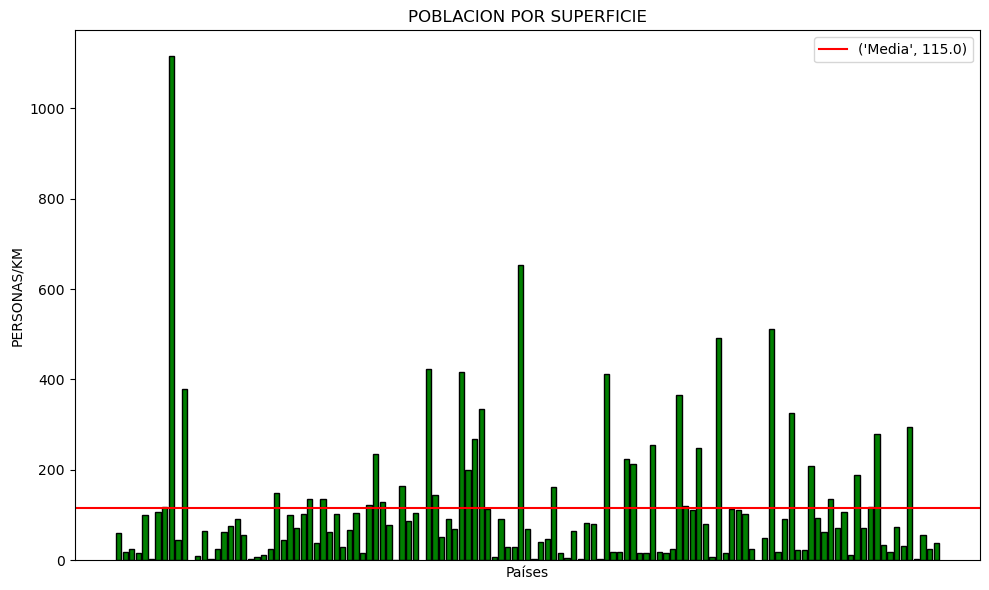

In [7]:
plt.figure(figsize=(10, 6))
barras = plt.bar(dfcopy.index, dfcopy['poblacion/superficie'], color='green', edgecolor='black')
media = dfcopy['poblacion/superficie'].mean()
plt.axhline(y=media, color='red', linestyle='-', label=('Media', media.round(0)))
for barra in barras:
    barra.set_linewidth(1)
plt.title('POBLACION POR SUPERFICIE')
plt.xlabel('Países')
plt.ylabel('PERSONAS/KM')
plt.xticks([])
plt.legend()
plt.tight_layout()
plt.show()


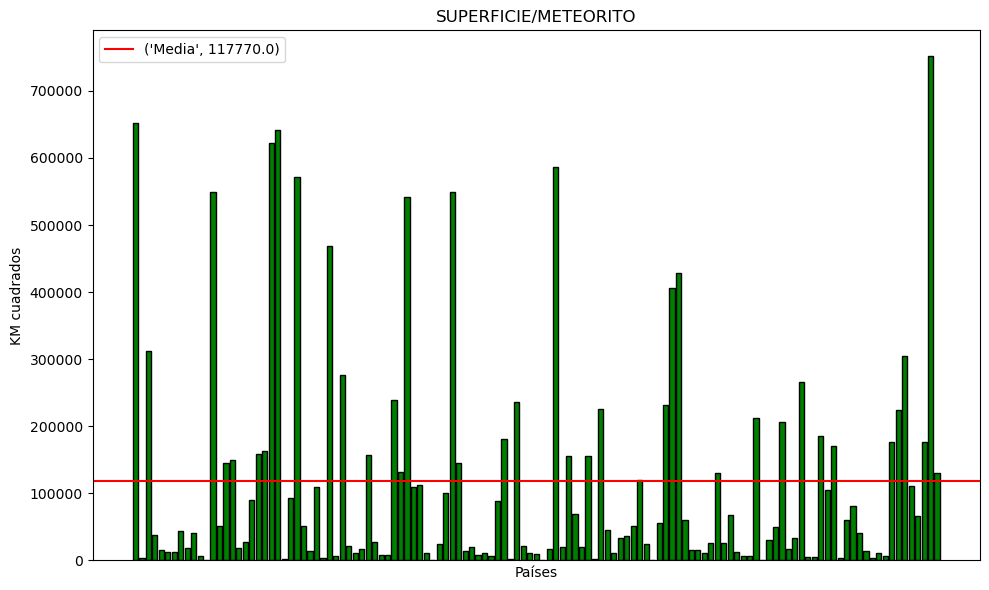

In [8]:
plt.figure(figsize=(10, 6))
barras = plt.bar(dfcopy.index, dfcopy['superficie/meteorito'], color='green', edgecolor='black')
media = dfcopy['superficie/meteorito'].mean()
plt.axhline(y=media, color='red', linestyle='-', label=('Media', media.round(0)))
for barra in barras:
    barra.set_linewidth(1)
plt.title('SUPERFICIE/METEORITO')
plt.xlabel('Países')
plt.ylabel('KM cuadrados')
plt.xticks([])
plt.legend()
plt.tight_layout()
plt.show()



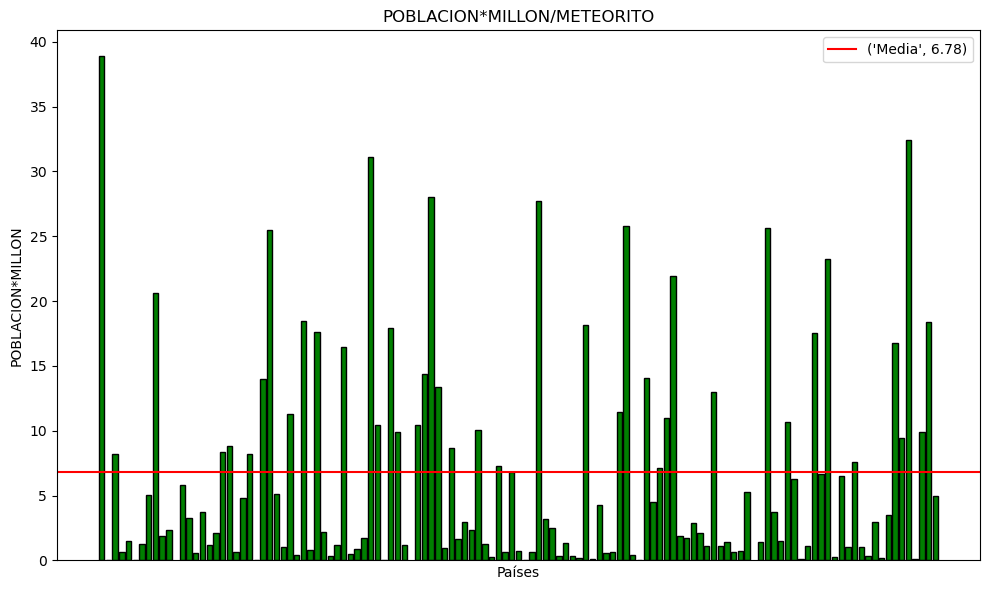

In [9]:
plt.figure(figsize=(10, 6))
barras = plt.bar(dfcopy.index, dfcopy['poblacion_M/meteorito'], color='green', edgecolor='black')
media = dfcopy['poblacion_M/meteorito'].mean()
plt.axhline(y=media, color='red', linestyle='-', label=('Media', media.round(2)))
for barra in barras:
    barra.set_linewidth(1)
plt.title('POBLACION*MILLON/METEORITO')
plt.xlabel('Países')
plt.ylabel('POBLACION*MILLON')
plt.xticks([])
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
dfcopy_top10 = df.copy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


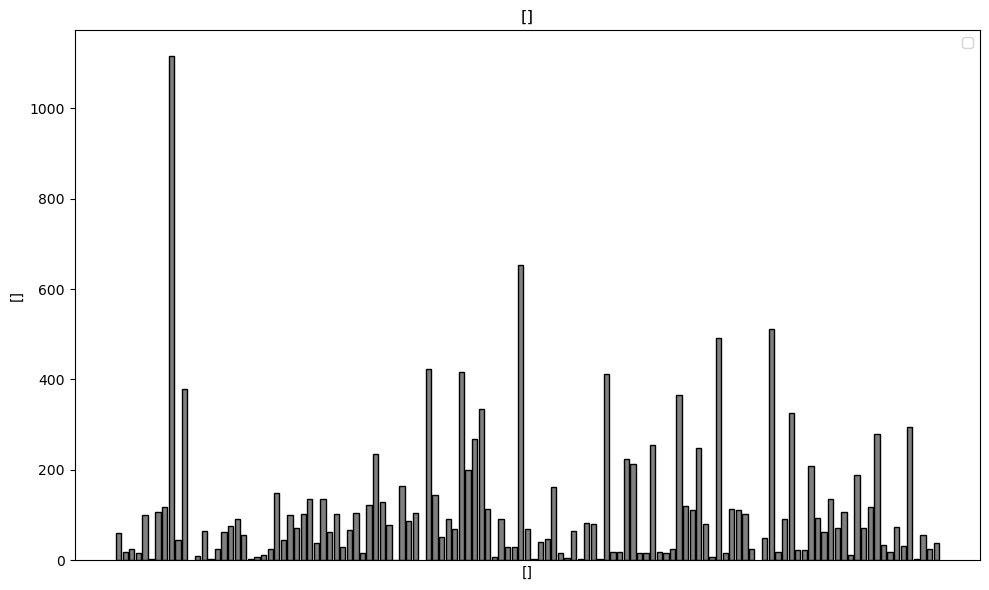

In [11]:
plt.figure(figsize=(10, 6))
barras = plt.bar(dfcopy.index, dfcopy['poblacion/superficie'], color='grey', edgecolor='black')
for barra in barras:
    barra.set_linewidth(1)
plt.title([])
plt.xlabel([])
plt.ylabel([])
plt.xticks([])
plt.legend()
plt.tight_layout()
plt.show()


TypeError: title() missing 1 required positional argument: 'label'

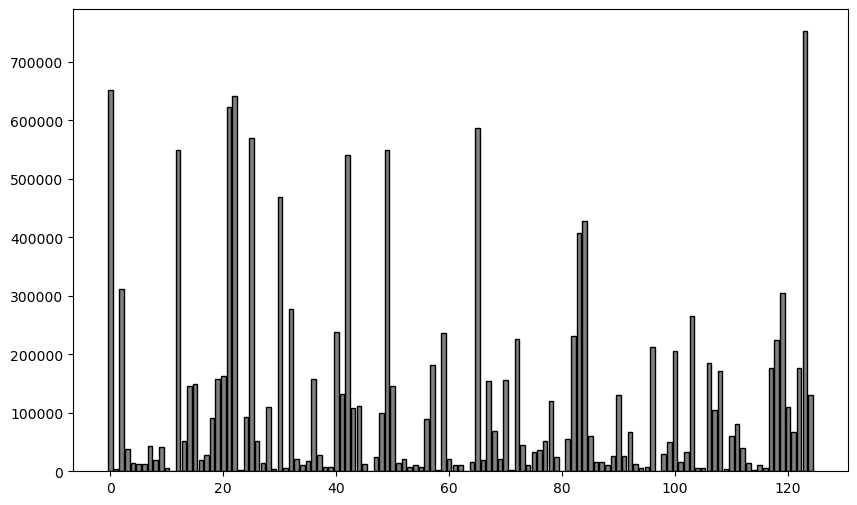

In [12]:
plt.figure(figsize=(10, 6))
barras = plt.bar(dfcopy.index, dfcopy['superficie/meteorito'], color='grey', edgecolor='black')
for barra in barras:
    barra.set_linewidth(1)
plt.title()
plt.xlabel([])
plt.ylabel([])
plt.xticks([])
plt.legend([])
plt.tight_layout([])
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


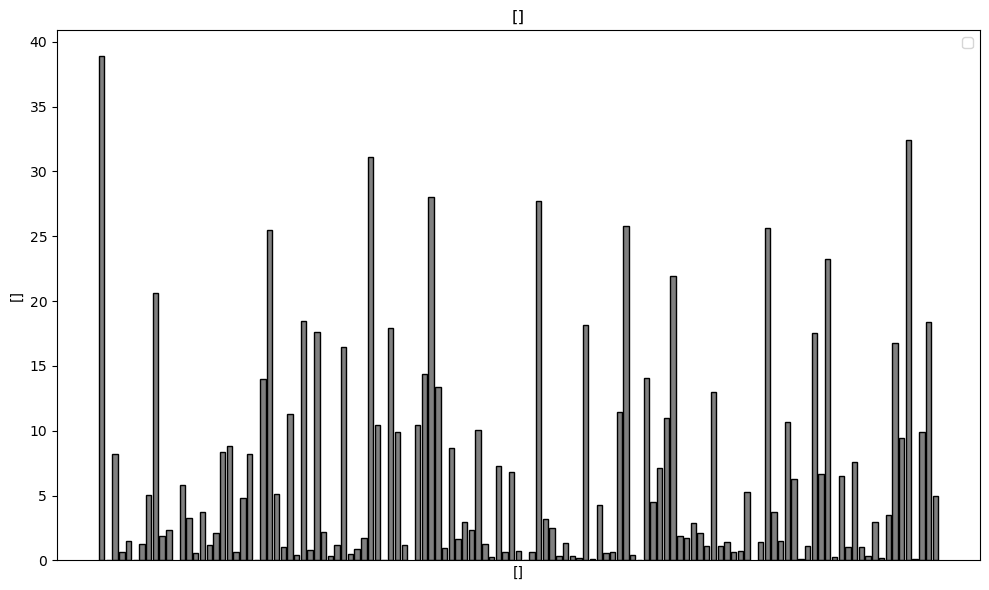

In [13]:
plt.figure(figsize=(10, 6))
barras = plt.bar(dfcopy.index, dfcopy['poblacion_M/meteorito'], color='grey', edgecolor='black')
for barra in barras:
    barra.set_linewidth(1)
plt.title([])
plt.xlabel([])
plt.ylabel([])
plt.xticks([])
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
dfcopy_sorted1 = dfcopy.sort_values(by='superficie/meteorito', ascending=True)
dfcopy_sorted1.head(8).iloc[3:]

,pais,green,orange,red,yellow,black,poblacion,superficie,superficie/meteorito,poblacion_M/meteorito,poblacion/superficie
80,Oman,1452,242,502,898,3094,5106622.0,309500,100.032321,0.001650,16.499586
63,Libya,634,123,211,495,1463,6871292.0,1759540,1202.693096,0.004697,3.905164
23,Chile,238,17,84,65,404,19116201.0,756102,1871.539604,0.047317,25.282569
71,Morocco,84,15,64,64,227,36910560.0,446550,1967.180617,0.162602,82.657172
58,Kenya,212,1,5,9,227,53771296.0,580367,2556.682819,0.236878,92.650506


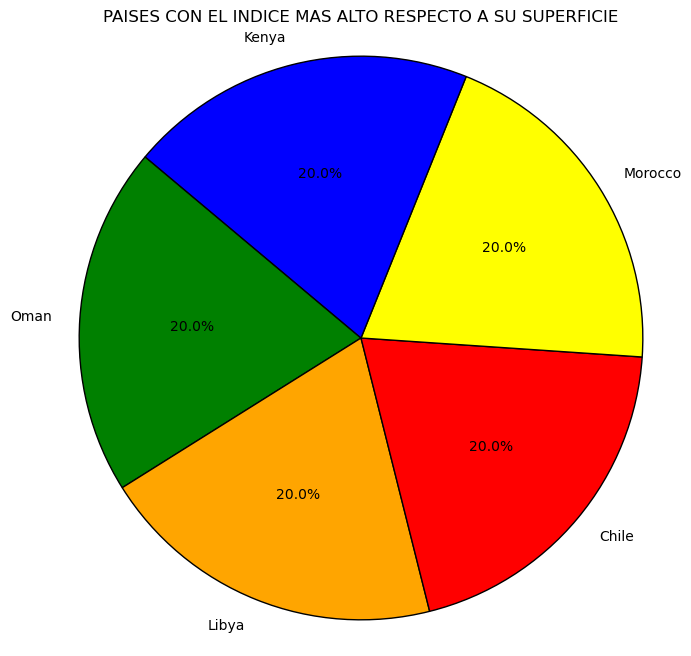

In [15]:
valores = [1000000-100.032321, 1000000-1202.693096, 1000000-871.539604, 1000000-1967.180617, 1000000-2556.682819]
colores = ["green", "orange", "red", "yellow", "blue"]
etiquetas = ["Oman", "Libya", "Chile", "Morocco", "Kenya"]
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='black'))
plt.title('PAISES CON EL INDICE MAS ALTO RESPECTO A SU SUPERFICIE')
plt.axis('equal')
plt.show()

In [16]:
dfcopy_sorted2 = dfcopy.sort_values(by='poblacion_M/meteorito', ascending=True)
dfcopy_sorted2.head(6)

,pais,green,orange,red,yellow,black,poblacion,superficie,superficie/meteorito,poblacion_M/meteorito,poblacion/superficie
80,Oman,1452,242,502,898,3094,5106622.0,309500,100.032321,0.001650,16.499586
63,Libya,634,123,211,495,1463,6871292.0,1759540,1202.693096,0.004697,3.905164
42,Greenland,0,0,3,1,4,56770.0,2166086,541521.500000,0.014193,0.026209
5,Australia,304,28,229,81,642,25499884.0,7692024,11981.345794,0.039719,3.315107
23,Chile,238,17,84,65,404,19116201.0,756102,1871.539604,0.047317,25.282569
1,Algeria,247,44,122,208,621,43851044.0,2381741,3835.331723,0.070614,18.411340


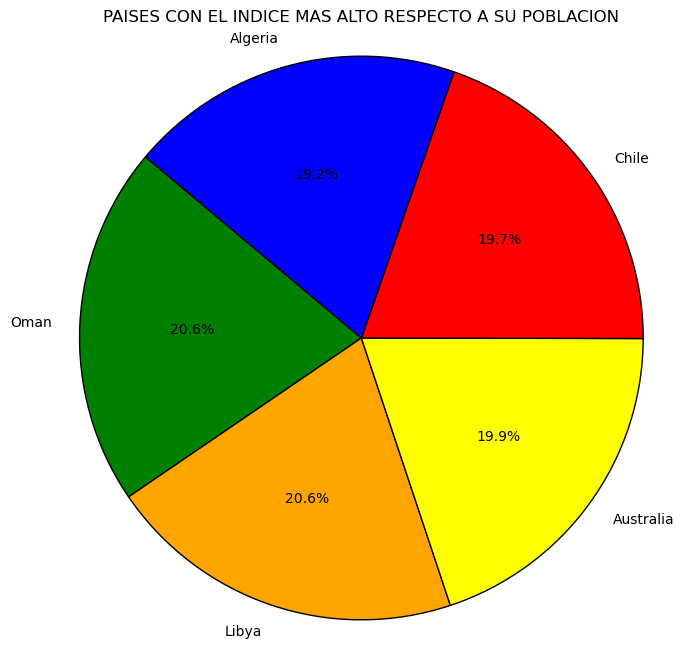

In [17]:
valores = [1-0.001650, 1-0.004697, 1-0.039719, 1-0.047317, 1-0.070614]
colores = ["green", "orange", "yellow", "red", "blue"]
etiquetas = ["Oman", "Libya", "Australia", "Chile", "Algeria"]
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='black'))
plt.title('PAISES CON EL INDICE MAS ALTO RESPECTO A SU POBLACION')
plt.axis('equal')
plt.show()

In [18]:
dfcopy_sorted3 = dfcopy.sort_values(by='poblacion/superficie', ascending=False)
dfcopy_sorted3.head(5)

,pais,green,orange,red,yellow,black,poblacion,superficie,superficie/meteorito,poblacion_M/meteorito,poblacion/superficie
8,Bangladesh,0,1,7,0,8,1.646894e+08,147570,18446.250000,20.586173,1116.008559
61,Lebanon,0,1,0,0,1,6.825442e+06,10452,10452.000000,6.825442,653.027363
99,South Korea,0,1,1,0,2,5.126918e+07,100210,50105.000000,25.634593,511.617453
91,Rwanda,0,0,1,0,1,1.295222e+07,26338,26338.000000,12.952218,491.769231
47,India,19,13,88,13,133,1.393409e+09,3287263,24716.263158,10.476760,423.881216


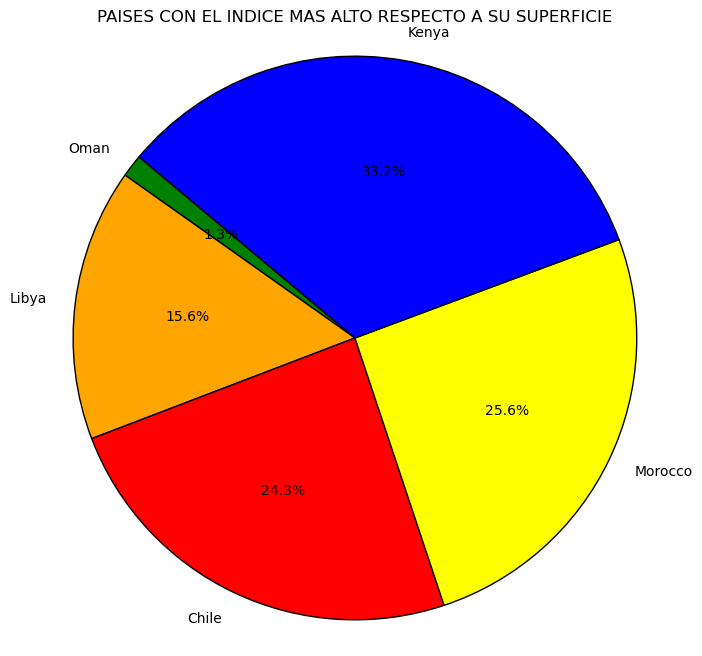

In [19]:
valores = [100.032321, 1202.693096, 1871.539604, 1967.180617, 2556.682819]
colores = ["green", "orange", "red", "yellow", "blue"]
etiquetas = ["Oman", "Libya", "Chile", "Morocco", "Kenya"]
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='black'))
plt.title('PAISES CON EL INDICE MAS ALTO RESPECTO A SU SUPERFICIE')
plt.axis('equal')
plt.show()

In [20]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pais                   125 non-null    object 
 1   green                  125 non-null    int64  
 2   orange                 125 non-null    int64  
 3   red                    125 non-null    int64  
 4   yellow                 125 non-null    int64  
 5   black                  125 non-null    int64  
 6   poblacion              122 non-null    float64
 7   superficie             125 non-null    int64  
 8   superficie/meteorito   125 non-null    float64
 9   poblacion_M/meteorito  122 non-null    float64
 10  poblacion/superficie   122 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 10.9+ KB


In [21]:
df1 = pd.read_csv("dfcopy.csv")
df1 = pd.DataFrame(df1)
df1

,Unnamed: 0,nombre,id,tipo_nombre,clase_meteorito,masa_gramos,encontrado,año,latitud,longitud,localizacion,peso_colores,grupo_años,pais
0,0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",green,1902 antes,Germany
1,1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",yellow,1942-52,Denmark
2,2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",red,1952-62,Canada
3,3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",red,1972-82,Mexico
4,4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",orange,1902-12,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45711,45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)",green,1982-92,France
45712,45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)",green,1992-02,Argentina
45713,45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)",green,1932-42,Argentina
45714,45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)",red,2002-12,Mauritania


In [22]:
df1copy = df1.copy()

In [23]:
grafica = df1.pivot_table(index='clase_meteorito', columns='peso_colores', aggfunc='size', fill_value=0)
df_grafica = pd.DataFrame(grafica)
df_grafica

peso_colores,green,orange,red,yellow
clase_meteorito,,,,
Acapulcoite,41,1,7,5
Acapulcoite/Lodranite,6,0,0,0
Acapulcoite/lodranite,3,0,0,0
Achondrite-prim,2,2,2,3
Achondrite-ung,35,1,8,13
...,...,...,...,...
Unknown,7,0,0,0
Ureilite,203,9,25,63
Ureilite-an,2,1,1,0


In [24]:
df_grafica["black"] = df1copy["clase_meteorito"].value_counts()
df_grafica

peso_colores,green,orange,red,yellow,black
clase_meteorito,,,,,
Acapulcoite,41,1,7,5,54
Acapulcoite/Lodranite,6,0,0,0,6
Acapulcoite/lodranite,3,0,0,0,3
Achondrite-prim,2,2,2,3,9
Achondrite-ung,35,1,8,13,57
...,...,...,...,...,...
Unknown,7,0,0,0,7
Ureilite,203,9,25,63,300
Ureilite-an,2,1,1,0,4


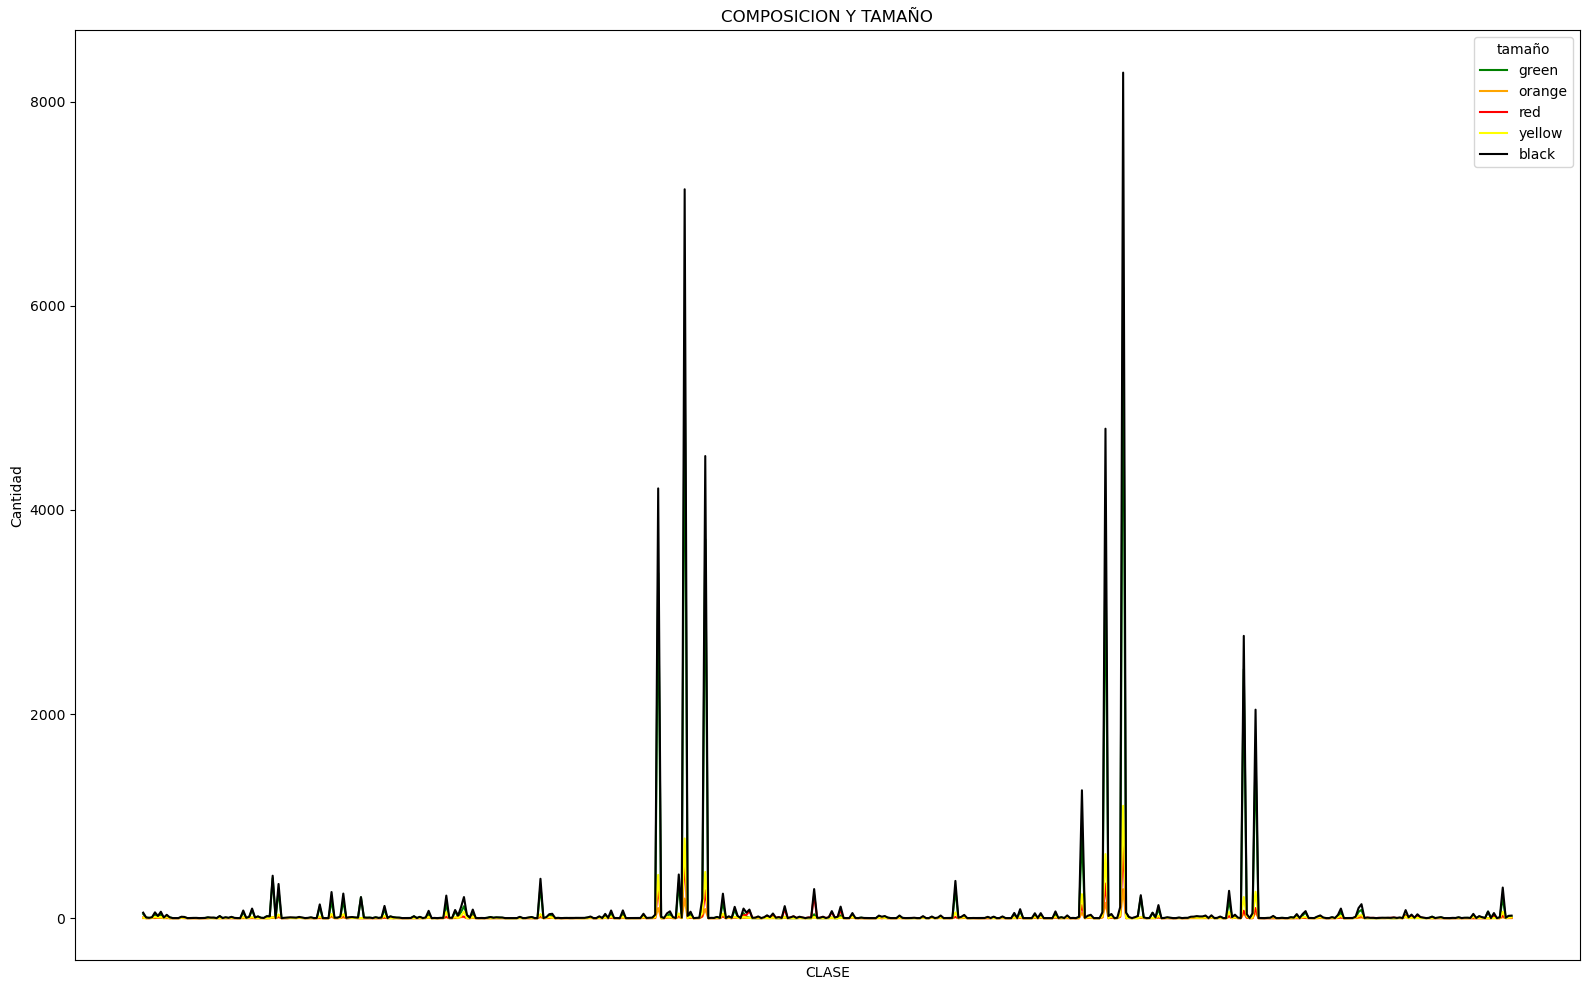

In [27]:
plt.figure(figsize=(16, 10))
for peso_color in df_grafica.columns:
    plt.plot(df_grafica.index, df_grafica[peso_color], color=peso_color, label=peso_color)
plt.title('COMPOSICION Y TAMAÑO')
plt.xlabel('CLASE')
plt.ylabel('Cantidad')
plt.xticks([])
plt.legend(title='tamaño')
plt.tight_layout()
plt.show()


In [32]:
df_grafica = df_grafica.sort_values(by='black', ascending=False)
df_grafica.head(10)

peso_colores,green,orange,red,yellow,black
clase_meteorito,,,,,
L6,6181,284,719,1101,8285
H5,5590,192,579,781,7142
L5,3678,151,339,628,4796
H6,3713,89,273,453,4528
H4,3383,99,305,424,4211
LL5,2439,47,73,207,2766
LL6,1626,59,99,259,2043
L4,839,50,129,235,1253
H4/5,345,10,27,46,428


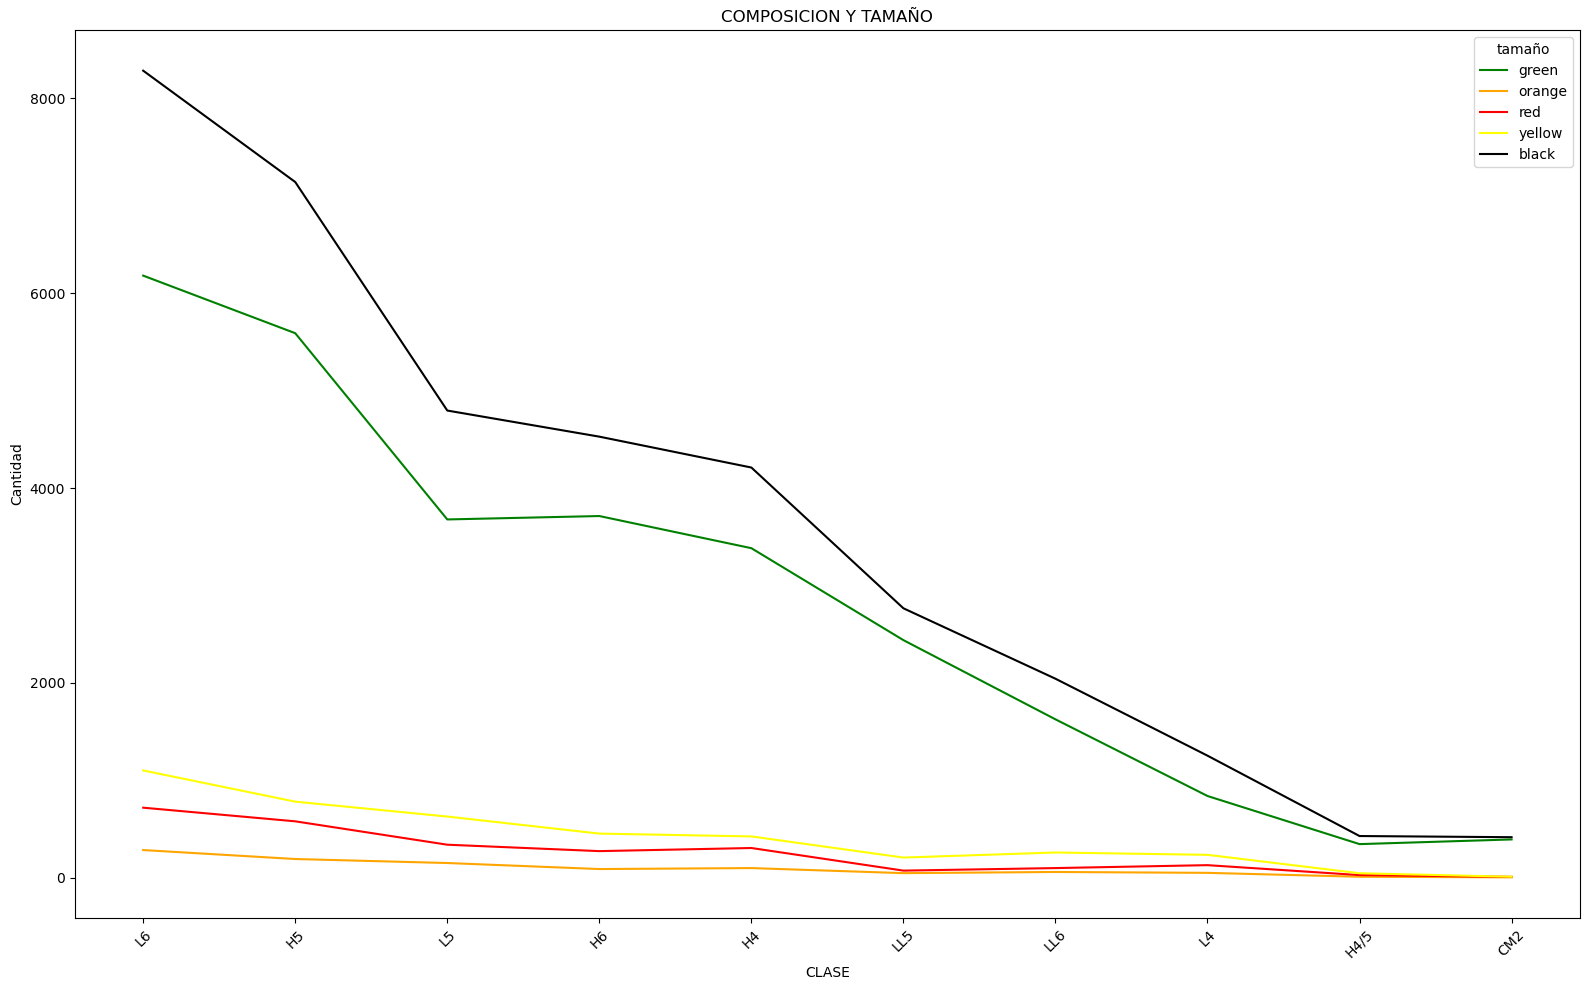

In [34]:
plt.figure(figsize=(16, 10))
for peso_color in df_grafica.head(10).columns:
    plt.plot(df_grafica.head(10).index, df_grafica.head(10)[peso_color], color=peso_color, label=peso_color)
plt.title('COMPOSICION Y TAMAÑO')
plt.xlabel('CLASE')
plt.ylabel('Cantidad')
plt.xticks(rotation= 45)
plt.legend(title='tamaño')
plt.tight_layout()
plt.show()

In [36]:
df1copy["peso_colores"].value_counts()

peso_colores
green     34261
yellow     5766
red        4283
orange     1406
Name: count, dtype: int64